In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

In [5]:
movies = pd.read_csv("..\datasets\movies.csv")

In [6]:
movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [7]:
data = movies[["movie_info","genres"]]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_info  17391 non-null  object
 1   genres      17693 non-null  object
dtypes: object(2)
memory usage: 276.9+ KB


In [9]:
data = data.dropna().reset_index(drop=True)

In [10]:
data.head()

,movie_info,genres
0,"Always trouble-prone, the life of teenager Per...","Action & Adventure, Comedy, Drama, Science Fic..."
1,Kate (Catherine Keener) and her husband Alex (...,Comedy
2,"A successful, middle-aged Hollywood songwriter...","Comedy, Romance"
3,Following the closing arguments in a murder tr...,"Classics, Drama"
4,"In 1866, Professor Pierre M. Aronnax (Paul Luk...","Action & Adventure, Drama, Kids & Family"


In [11]:
genres = data["genres"].copy()

In [12]:
def get_genres_list(genres):
    genres_list = list(map(lambda x:x.split(","),genres))
    for i in range(len(genres_list)):
        for j in range(len(genres_list[i])):
            genres_list[i][j] = genres_list[i][j].strip()
    return genres_list

In [13]:
genres_list = get_genres_list(genres)

genres_list[5]

['Action & Adventure', 'Classics', 'Drama']

In [14]:
data["genres"]=genres_list

In [15]:
data.head()

,movie_info,genres
0,"Always trouble-prone, the life of teenager Per...","[Action & Adventure, Comedy, Drama, Science Fi..."
1,Kate (Catherine Keener) and her husband Alex (...,[Comedy]
2,"A successful, middle-aged Hollywood songwriter...","[Comedy, Romance]"
3,Following the closing arguments in a murder tr...,"[Classics, Drama]"
4,"In 1866, Professor Pierre M. Aronnax (Paul Luk...","[Action & Adventure, Drama, Kids & Family]"


In [16]:
target = pd.get_dummies(data.genres.explode()).sum(level=0)

In [17]:
target.head()

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
target.shape

(17372, 21)

[Text(0, 0.5, 'Genre')]

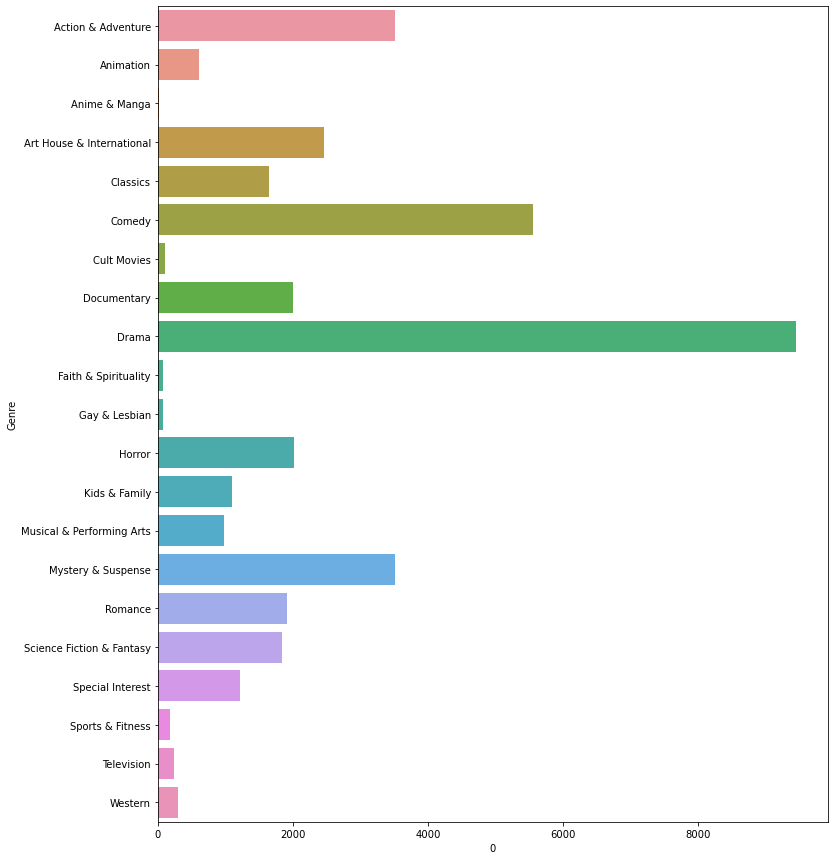

In [19]:
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=pd.DataFrame(target.sum()).reset_index(), x= 0, y = "index") 
ax.set(ylabel = 'Genre') 

In [20]:
features = data["movie_info"]

In [21]:
features.shape

(17372,)

In [22]:
full_data = pd.concat([features,target],axis=1)

In [23]:
full_data.shape

(17372, 22)

In [24]:
full_data.head()

,movie_info,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,"Always trouble-prone, the life of teenager Per...",1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,Kate (Catherine Keener) and her husband Alex (...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"A successful, middle-aged Hollywood songwriter...",0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Following the closing arguments in a murder tr...,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"In 1866, Professor Pierre M. Aronnax (Paul Luk...",1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [25]:
to_drop = ["Anime & Manga","Cult Movies","Faith & Spirituality","Gay & Lesbian","Sports & Fitness","Television","Western"]
full_data = full_data.drop(to_drop,axis=1)

In [26]:
full_data.shape

(17372, 15)

In [27]:
(full_data.sum(axis=1)==0).any()

True

In [28]:
full_data = full_data[full_data.sum(axis=1)!=0].reset_index(drop=True)

In [29]:
full_data.shape

(17362, 15)

In [30]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17362 entries, 0 to 17361
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   movie_info                 17362 non-null  object
 1   Action & Adventure         17362 non-null  uint8 
 2   Animation                  17362 non-null  uint8 
 3   Art House & International  17362 non-null  uint8 
 4   Classics                   17362 non-null  uint8 
 5   Comedy                     17362 non-null  uint8 
 6   Documentary                17362 non-null  uint8 
 7   Drama                      17362 non-null  uint8 
 8   Horror                     17362 non-null  uint8 
 9   Kids & Family              17362 non-null  uint8 
 10  Musical & Performing Arts  17362 non-null  uint8 
 11  Mystery & Suspense         17362 non-null  uint8 
 12  Romance                    17362 non-null  uint8 
 13  Science Fiction & Fantasy  17362 non-null  uint8 
 14  Specia

In [31]:
full_data.head()

,movie_info,Action & Adventure,Animation,Art House & International,Classics,Comedy,Documentary,Drama,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest
0,"Always trouble-prone, the life of teenager Per...",1,0,0,0,1,0,1,0,0,0,0,0,1,0
1,Kate (Catherine Keener) and her husband Alex (...,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"A successful, middle-aged Hollywood songwriter...",0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,Following the closing arguments in a murder tr...,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,"In 1866, Professor Pierre M. Aronnax (Paul Luk...",1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [32]:
full_data.to_csv("processed_data.csv")

In [33]:
features = full_data["movie_info"]
target = full_data.drop("movie_info",axis=1)

In [34]:
print(features.shape)
print(target.shape)

(17362,)
(17362, 14)


In [35]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", " ", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    lem = WordNetLemmatizer()
    porter_stemmer  = PorterStemmer()
    words = nltk.word_tokenize(text)
    text = []
    for w in words:
        if w in stopwords.words('english'):
            continue
        w=lem.lemmatize(w)
        rootWord = porter_stemmer.stem(w)
        text.append(rootWord)
    return " ".join(text)

In [36]:
def clean_data(data):
    return data.apply(lambda x:clean_text(x))

In [37]:
def transform_data(data):
    data = clean_data(data)
    tfidf = TfidfVectorizer(stop_words='english')
    matrix = tfidf.fit_transform(data)
    return matrix,tfidf

In [38]:
sparse_matrix,tfdif = transform_data(features)

In [70]:
sparse_matrix

<17362x45160 sparse matrix of type '<class 'numpy.float64'>'
	with 509184 stored elements in Compressed Sparse Row format>

In [39]:
def buil_model(genre,X,Y,classification_fn,hyp,print_score=True):
    x = X
    y = Y[genre]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
    
    grid_search = GridSearchCV(classification_fn(), hyp, cv=3, return_train_score=True)
    grid_search.fit(x_train, y_train)
    y_pred = grid_search.predict(x_test)
    f1 = f1_score(y_test,y_pred)
    
    if print_score:
        acc = accuracy_score(y_test, y_pred, normalize=True)
        num_acc = accuracy_score(y_test, y_pred, normalize=False)
        prec = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        print("Test data count: ",len(y_test))
        print("accuracy_count : " , num_acc)
        print("accuracy_score : " , acc)
        print("precision_score : " , prec)
        print("recall_score : ", recall)
        print("f1_score : ", f1)
        print()
        print("best para : ",grid_search.best_params_)
        
    return grid_search,f1

In [40]:
genre = "Comedy"

In [ ]:
hyp = {'penalty': ['l2'],'C': [400,200,150,100],'max_iter': [10000],                      
    'solver': ['newton-cg'],'class_weight': ['balanced'],'n_jobs': [-1] }

model,f1 = buil_model(genre,sparse_matrix,target,LogisticRegression,hyp)

In [37]:
hyp = {'alpha': np.linspace(0.2, 1.5, 10),
  'fit_prior': [True, False],}

model,f1 = buil_model(genre,sparse_matrix,target,MultinomialNB,hyp)

Test data count:  3473
accuracy_count :  2690
accuracy_score :  0.7745465015836452
precision_score :  0.6386093321134492
recall_score :  0.6427255985267035
f1_score :  0.64066085360257

best para :  {'alpha': 0.34444444444444444, 'fit_prior': False}


In [93]:
hyp = {'max_depth': [1000,2000,4000]}

model,f1 = buil_model(genre,sparse_matrix,target,DecisionTreeClassifier,hyp)

Test data count:  3473
accuracy_count :  3100
accuracy_score :  0.8926000575871005
precision_score :  0.43086816720257237
recall_score :  0.40606060606060607
f1_score :  0.41809672386895474

best para :  {'max_depth': 1000}


In [38]:
hyp = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'loss': ['log'], 
    'penalty': ['l2'],
    'n_jobs': [-1] ,
       'tol':[1e-1,1e-2,1e-3]}

model,f1 = buil_model(genre,sparse_matrix,target,SGDClassifier,hyp)

Test data count:  3473
accuracy_count :  2653
accuracy_score :  0.7638928879930895
precision_score :  0.8026315789473685
recall_score :  0.33394160583941607
f1_score :  0.4716494845360824

best para :  {'alpha': 0.0001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2', 'tol': 0.1}


In [102]:
hyp = {'radius':[30000]}

model,f1 = buil_model(genre,sparse_matrix,target,RadiusNeighborsClassifier,hyp)

Test data count:  3473
accuracy_count :  1879
accuracy_score :  0.5410308090987619
precision_score :  0.5410308090987619
recall_score :  1.0
f1_score :  0.7021674140508222

best para :  {'radius': 30000}


In [106]:
hyp = {'max_iter':[5000,10000], 'tol':[1e-3,1e-4,1e-5],'C': [0.001,0.05,0.1, 0.4, 0.8, 1, 2, 5]}

model,f1 = buil_model(genre,sparse_matrix,target,LinearSVC,hyp)

Test data count:  3473
accuracy_count :  3169
accuracy_score :  0.9124676072559746
precision_score :  0.7525773195876289
recall_score :  0.48558758314855877
f1_score :  0.5902964959568733

best para :  {'C': 5, 'max_iter': 5000, 'tol': 0.001}


In [39]:
def build_all_models(genres,fn,res):
    if fn == LogisticRegression:
        hyp = {'penalty': ['l2'],'C': [400,200,150],'max_iter': [10000],                      
    'solver': ['newton-cg'],'class_weight': ['balanced'],'n_jobs': [-1] }
    elif fn == SGDClassifier:
        hyp = {'alpha': [1e-4, 1e-1, 1e0, 1e1, 1e3], # learning rate
    'loss': ['log'], 
    'penalty': ['l2'],
    'n_jobs': [-1] ,
       'tol':[1e-1,1e-3]}
    elif fn==LinearSVC:
        hyp = {'max_iter':[5000,10000], 'tol':[1e-3,1e-5],'C': [0.001,0.1, 0.4, 1, 5]}
    elif fn==RadiusNeighborsClassifier:
        hyp = {'radius':[30000]}
    elif fn==DecisionTreeClassifier:
        hyp = {'max_depth': [1000,10000,100000]}
    elif fn==MultinomialNB:
        hyp = {'alpha': np.linspace(0.2, 1.5, 10),
  'fit_prior': [True, False],}
    else:
        hyp={}

    for genre in genres:
        model,f1 = buil_model(genre,sparse_matrix,target,fn,hyp,print_score=False)
        if genre not in res.keys() or res[genre][1]<f1:
            res[genre]=(model,f1)

In [40]:
def build_best_models(genres,classification_fns):
    res = {}
    for fn in classification_fns:
        build_all_models(genres,fn,res)
        print(fn)
    return res

In [41]:
all_genres = set()
for l in genres_list:
    for genre in l:
        all_genres.add(genre)

In [42]:
all_genres = all_genres.difference(to_drop)

In [43]:
classification_fns = [LogisticRegression,MultinomialNB,SGDClassifier,LinearSVC]

In [44]:
models = build_best_models(all_genres,classification_fns)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.naive_bayes.MultinomialNB'>
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
<class 'sklearn.svm._classes.LinearSVC'>


In [163]:
models = {}
build_all_models(all_genres,MultinomialNB,models)

In [45]:
def print_scores(models):
    for key in models:
        print(key," : ",models[key][1])

In [46]:
print_scores(models)

Special Interest  :  0.4029484029484029
Classics  :  0.4618055555555556
Horror  :  0.6286509040333796
Science Fiction & Fantasy  :  0.5423728813559322
Kids & Family  :  0.5081081081081081
Documentary  :  0.7001321003963012
Mystery & Suspense  :  0.48384673178061605
Action & Adventure  :  0.5907780979827089
Art House & International  :  0.33418367346938777
Comedy  :  0.654625550660793
Animation  :  0.43333333333333335
Romance  :  0.3746397694524496
Drama  :  0.7517482517482517
Musical & Performing Arts  :  0.4559270516717326


In [47]:
def pred(movie_info):
    temp = tfdif.transform([movie_info])
    res = []
    for key in models:
        pred = models[key][0].predict(temp)
        if pred==[1]:
            res.append(key)
    return res

In [48]:
test_movies={
    "Breaking Bad":"When Walter White, a New Mexico chemistry teacher, is diagnosed with Stage III cancer and given a prognosis\
    of only two years left to live. He becomes filled with a sense of fearlessness and an unrelenting desire to secure his \
    family's financial future at any cost as he enters the dangerous world of drugs and crime.",
    "Game of thrones":"Seven noble families fight for control of the mythical land of Westeros. Friction between the houses \
    leads to full-scale war. All while a very ancient evil awakens in the farthest north. Amidst the war, a neglected military \
    order of misfits, the Night's Watch, is all that stands between the realms of men and icy horrors beyond."}

In [50]:
for movie in test_movies:
    print(movie," : ",pred(test_movies[movie]))

Breaking Bad  :  ['Action & Adventure', 'Drama']
Game of thrones  :  ['Horror', 'Science Fiction & Fantasy']


In [51]:
pred("101-year-old Rose DeWitt Bukater tells the story of her life aboard the Titanic, 84 years later. A young Rose boards the ship with her mother and fiancé. Meanwhile, Jack Dawson and Fabrizio De Rossi win third-class tickets aboard the ship. Rose tells the whole story from Titanic's departure through to its death—on its first and last voyage—on April 15, 1912.")

['Romance', 'Drama']

In [53]:
pred("Instead of flying to Florida with his folks, Kevin ends up alone in New York, where he gets a hotel room with his dad's credit card—despite problems from a clerk and meddling bellboy. But when Kevin runs into his old nemeses, the Wet Bandits, he's determined to foil their plans to rob a toy store on Christmas eve.")

['Kids & Family', 'Comedy']